# 교재 4.9장 - 캐글 산탄데르 고객 만족 예측




370개 피처 데이터 세트에서 고객 만족 여부 예측하기

클래스 레이블 명 = 'TARGET
- 1: 불만을 가진 고객
- 0: 만족한 고객

성능 평가: ROC-AUC

- 불만족 데이터는 중요하지만 일부일 것이기 때문

## 데이터 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/train_santender.csv")
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


클래스 값 칼럼 포함 피처 개수 371개

(피처 이름 익명 처리됨)

In [ ]:
# 피처 데이터 타입, Null 값 확인
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


float-111, int-260

Null 값 X

In [ ]:
# Target 값 분포 확인
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET']==1].TARGET.count() # 불만족 고객
total_cnt = cust_df.TARGET.count() # 전체 고객
print('unsatistied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatistied 비율은 0.04


In [ ]:
# 각 피처 값 분포 간단히 확인
cust_df.describe()
# print(cust_df.var3.value_counts()[:10]) # var3 10종류 값 개수 세기

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


var3 값의 NaN 또는 특정 예외 값을 -99999로 처리함


-> 2로 변환

ID 피처 드롭

In [ ]:
# 데이터 전처리
cust_df['var3'].replace(-99999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 & 레이블 세트 분리
# 레이블 칼럼: DataFrame의 맨 마지막에 위치 -> 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape: {0}'.format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [ ]:
# 학습 & 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count() # 학습 데이터 개수
test_cnt = y_test.count()   # 테스트 데이터 개수
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


학습 & 테스트 데이터 세트 TARGET 분포

- 둘 다 불만족(값 1)이 약 4% -> 잘 나뉨

<br>

XGBoost의 조기 중간 검증 데이터 세트로 활용할 tr, val 값 만들기

In [ ]:
# X_train, y_train 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝
### XGBoost의 학습 모델 생성 & 예측 성능 평가하기

XGBClassifier 기반 학습 수행
- n_estimators=500
- ealry_stopping_rounds=100
- eval_metric='auc'
- eval_set=[(X_tr, y_tr), (X_val, y_val)]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# XGBClassifier 객체 생성
## 조기 중단 파라미터, 성능 평가 방법을 이때 지정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, early_stopping_rounds=100, eval_metric="auc", random_state=156)

# 학습
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85101	validation_1-auc:0.81966
[12]	validation_0-auc:0.85215	validation_1-auc:0.82001
[13]	validation_0-auc:0.85303	validation_1-auc:0.82047
[14]	validation_0-auc:0.85562	validation_1-auc:0.82219
[15]	validation_0-auc:0.85656	validation_1-auc:0.82298
[16]	validation_0-auc:0.85816	validation_1-auc:0.82379
[17]	validation_0-auc:0.85866	validation_1-auc:0.82369
[18]	validation_0-au

ROC AUC: 0.8414

### HyperOpt 이용해 베이지안 최적화 기법으로 XGBoost 하이퍼 파라미터 튜닝

하이퍼 파라미터 검색 공간 설정
- max_depth: 5~15 1간격
- min_child_weight: 1~6 1간격
- colsample_bytree: 0.5~0.95 정규 분포
- learning_rate: 0.01~0.2 정규 분포

In [ ]:
from hyperopt import hp

# 검색 공간 설정
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

목적 함수 생성
- 3 Fold 교차 검증: KFold 클래스로 데이터 추출하고 학습 및 평가 수행
- 평균 ROC-AUC 값 반환 -> 최소 반환값이 되도록 해야 함!!


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 생성
# : fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값 바노한
def objective_func(search_space):
  # early stopping은 30회로 설정, 평가 방식은 ROC-AUC
  xgb_clf = XGBClassifier(n_estimators=100, early_stopping_rounds=30, eval_metric='auc',
                          max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate'])

  # 3개 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
  roc_auc_list = []

  # 3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  # X_train을 다시 학습과 검증용 데이터로 분리 - 인덱스를 통해 직접 분리
  for tr_index, val_index in kf.split(X_train):
    # kf.split(X_train)으로 추출된 학습 & 검증 index 값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
    xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

    # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
    ## predict_proba: 각 클래스에 대해 예측한 값의 확률을 반환
    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
  # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
  return -1*np.mean(roc_auc_list)

fmin() 함수로 최적 하이퍼 파라미터 도출하기
- max_eval=50

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출
## max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수
            trials=trials,
            rstate=np.random.default_rng(seed=30))
print('best: ', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[14]	validation_0-auc:0.87738	validation_1-auc:0.83204
[15]	validation_0-auc:0.87770	validation_1-auc:0.83161
[16]	validation_0-auc:0.87947	validation_1-auc:0.83212
[17]	validation_0-auc:0.88006	validation_1-auc:0.83269
[18]	validation_0-auc:0.88087	validation_1-auc:0.83336
[19]	validation_0-auc:0.88154	validation_1-auc:0.83328
[20]	validation_0-auc:0.88186	validation_1-auc:0.83250
[21]	validation_0-auc:0.88181	validation_1-auc:0.83219
[22]	validation_0-auc:0.88239	validation_1-auc:0.83237
[23]	validation_0-auc:0.88304	validation_1-auc:0.83291
[24]	validation_0-auc:0.88279	validation_1-auc:0.83205
[25]	validation_0-auc:0.88281	validation_1-auc:0.83244
[26]	validation_0-auc:0.88383	validation_1-auc:0.83288
[27]	validation_0-auc:0.88468	validation_1-auc:0.83310
[28]	validation_0-auc:0.88442	validation_1-auc:0.83247
[29]	validation_0-auc:0.88403	validation_1-auc:0.83198
[30]	validation_0-auc:0.88459	validation_1-auc:0.83263
[31]	validation_0-auc:0.88463

학습 결과
- 'colsample_bytree': 0.6621889553364674
- 'learning_rate': 0.10548643039738301
- 'max_depth': 5.0
- 'min_child_weight': 6.0

도출된 최적 하이퍼 파라미터로 XGBClassifier 재학습,

테스트 데이터 세트에서 ROC AUC 측정
- n_estimators=500

In [ ]:
# n_estimators를 500으로 증가시키고 최적 하이퍼 파라미터로 재학습, 예측
# early stopping = 100
xgb_clf = XGBClassifier(n_estimators=500,
                        early_stopping_rounds=100,
                        learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5))

# evaluation metric = auc
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-logloss:0.20798	validation_1-logloss:0.20879
[1]	validation_0-logloss:0.19851	validation_1-logloss:0.19963
[2]	validation_0-logloss:0.19136	validation_1-logloss:0.19267
[3]	validation_0-logloss:0.18403	validation_1-logloss:0.18563
[4]	validation_0-logloss:0.17754	validation_1-logloss:0.17936
[5]	validation_0-logloss:0.17185	validation_1-logloss:0.17384
[6]	validation_0-logloss:0.16671	validation_1-logloss:0.16895
[7]	validation_0-logloss:0.16268	validation_1-logloss:0.16520
[8]	validation_0-logloss:0.15879	validation_1-logloss:0.16154
[9]	validation_0-logloss:0.15582	validation_1-logloss:0.15867
[10]	validation_0-logloss:0.15271	validation_1-logloss:0.15584
[11]	validation_0-logloss:0.14990	validation_1-logloss:0.15314
[12]	validation_0-logloss:0.14734	validation_1-logloss:0.15075
[13]	validation_0-logloss:0.14518	validation_1-logloss:0.14886
[14]	validation_0-logloss:0.14319	validation_1-logloss:0.14709
[15]	validation_0-logloss:0.14173	validation_1-logloss:0.14591
[1

튜닝 전 auc: 0.8414

튜닝 후 auc: 0.8459

XGBoost는 GBM을 기반으로 하고 있기 떄문에 수행 시간이 상당히 길었음...

앙상블 계열 알고리즘
- 과적합, 잡음에 good
- 하이퍼 파라미터 튜닝으로도 성능 수치 개선은 bad
- 수행 시간 bad

### 피처 중요도 그래프 나타내기

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

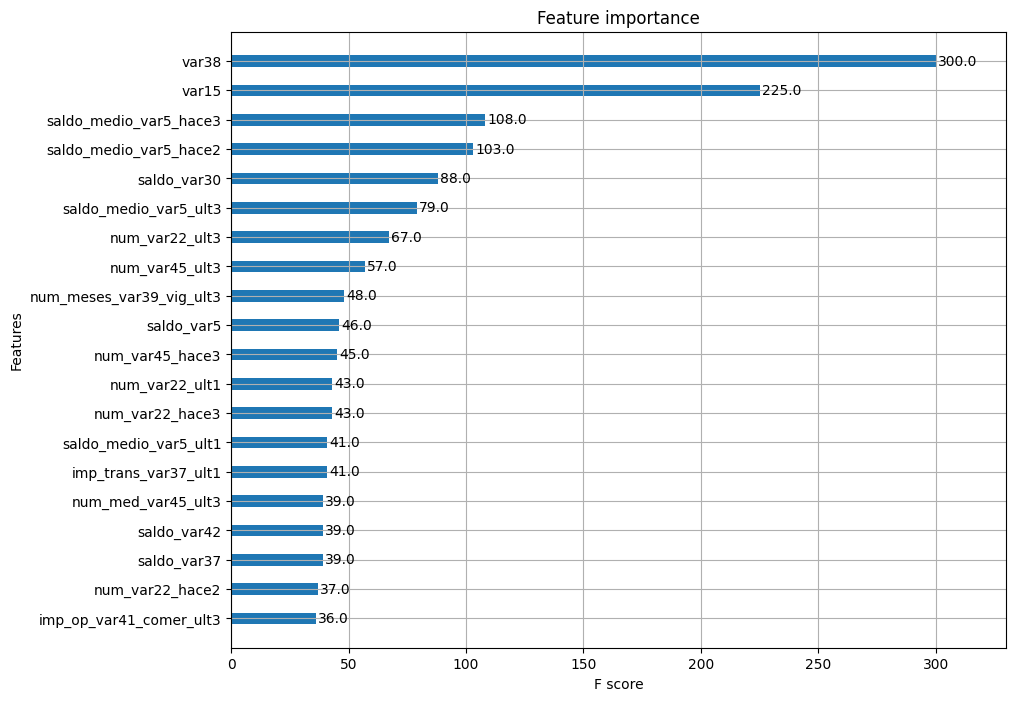

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

중요한 피처 돌려보고 적기

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=100), log_evaluation(1)],
             eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	trainin

튜닝 전 lgbm auc 값: 0.8390

-> XGBoost보다 수행 시간이 짧음

### HyperOpt로 하이퍼 파라미터 튜닝하기

하이퍼 파라미터 검색 공간 설정

In [ ]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

목적 함수 생성

In [ ]:
def objective_func(search_space):
  # 평가 방식은 ROC-AUC
  lgbm_clf = LGBMClassifier(n_estimators=100,
                            num_leaves=int(search_space['num_leaves']),
                            max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'])

  # 3개 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
  roc_auc_list = []

  # 3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  # X_train을 다시 학습과 검증용 데이터로 분리 - 인덱스를 통해 직접 분리
  for tr_index, val_index in kf.split(X_train):
    # kf.split(X_train)으로 추출된 학습 & 검증 index 값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행
    # early stopping은 30회로 설정
    lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=30)], eval_metric="auc",
                eval_set=[(X_tr, y_tr), (X_val, y_val)])

    # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
    ## predict_proba: 각 클래스에 대해 예측한 값의 확률을 반환
    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
  # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
  return -1*np.mean(roc_auc_list)

### fmin()으로 최적 하이퍼 파라미터 도출

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출
# max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수 지정
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print('best:', best)

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12828
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872
[LightGBM] [Info] Start training from score -3.205872
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[98]	training's auc: 0.887648	training's binary_logloss: 0.121808	valid_1's auc: 0.831536	valid_1's binary_logloss: 0.135864
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064222 seconds.
You can set `force_row_wise=true`

최적 하이퍼 파라미터로 재학습 후 roc-auc 평가

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500,
                          num_leaves=int(best['num_leaves']),
                          learning_rate=round(best['learning_rate'], 5),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'], 5))

# evaluation metric = auc, early stopping = 100
lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=100), log_evaluation(1)], eval_metric="auc",
             eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12993
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.831214	training's binary_logloss: 0.160668	valid_1's auc: 0.80629	valid_1's binary_logloss: 0.162296
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.837893	training's binary_logloss: 0.157551	valid_1's auc: 0.810666	valid_1's binary_logloss: 0.159674
[3]	training's auc: 0.840797	training's binary_logloss: 0.154895	valid_1's auc: 0.815247	valid_1's binary_logloss: 0.157466
[4]	trai

튜닝 전 roc-auc: 0.8390

튜닝 후 roc-auc: 0.8402

# 교재 4.10장 - 캐글 신용카드 사기 검출


신용카드 사기 검출 분류 실습하기

creditcard.csv 데이터
- 레이블 = Class
- 0: 정상 트랜잭션 데이터
- 1: 사기 트랜잭션 데이터 -> 매우 적음

## 언더 샘플링과 오버 샘플링
극도로 불균형한 레이블 값 분포를 가진 데이터에 대한 예측 성능을 높이기 위한 방안

- 언더 샘플링: 많은 레이블 데이터 세트 -> 수 줄임
- 오버 샘플링: 적은 레이블 데이터 세트 -> 수 늘림

  == 수 맞추기

오버 샘플링
- SMOTE(Synthetic Minority Over-sampling Technique) 방법
: 적은 데이터 세트 개별 데이터의 K 최근접 이웃을 찾아 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터 생성
   
   - 파이썬 패키지 imbalanced-learn으로 구현

## 데이터 일차 가공 및 모델 학습/예측/평가

### 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# creditcard.csv 파일 DataFrame으로 로딩
card_df = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


- Vn: 의미 알 수 X
- Time: 데이터 생성 관련 작업용 속성 - 의미 X
- Amount: 신용카드 트랜잭션 금액
- Class: 0 정상 / 1 사기

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- 284807개 레코드
- 결측치 (Missing Value) X
- Class 레이블만 int, 나머지 float

### 데이터 분할
데이터 가공 함수 get_train_test_df()

In [ ]:
from sklearn.model_selection import train_test_split

# DataFrame df 복사 -> Time 칼럼만 삭제하고 복사된 DataFrame 반환하는 함수
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트 반환 함수
def get_train_test_dataset(df=None):
  # df의 사전 데이터 가공이 완료된 복사본 반환
  df_copy = df.copy()
  # df의 마지막 칼럼이 레이블, 나머지는 피처
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  # 데이터 분할, stratify=y_target으로 Stratified 기반 분할
  ### stratified -> 레이블의 분포가 일정하도록 데이터 분할하는 것
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
# 학습과 테스트 데이터 세트의 레이블 값 비율 확인하기
### shape[0]: 데이터 개수
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


두 데이터 레이블 비율이 비슷함

### 모델 생성

로지스틱 회귀 모델

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# 성능 평가 함수
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85278    17]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8455, 재현율: 0.6284,      F1:0.7209, AUC:0.9575


LightGBM 모델

In [ ]:
# 파라미터 - 사이킷런 Estimator 객체, 학습/테스트 데이터 세트 입력
# -> 학습/예측/평가 수행 함수
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred=model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
# LightGBM 모델 학습
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

Logistic Regression: 재현율 0.6284 ROC-AUC 0.9575

LGBMClassifier&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 재현율 0.7568 ROC-AUC 0.9803

*boost_from_average=False*
*- 불균형한 레이블 값 분포도*
  
  *-> LGBMClassifier 객체 생성 시 boost_from_average=False 지정*
*- boost_from_average: 첫 트리 학습 시 전체 데이터의 레이블 평균값을 기반으로 예측할지 결정하는 파라미터 *

  *-> 불균형한 레이블일 경우, 평균에서 학습하면 예측 성능이 떨어지게 됨*
  *- default=True*

## 데이터 분포도 변환 후 모델 학습/예측/평가


### 데이터 분포도 정규 분포로 가공하기

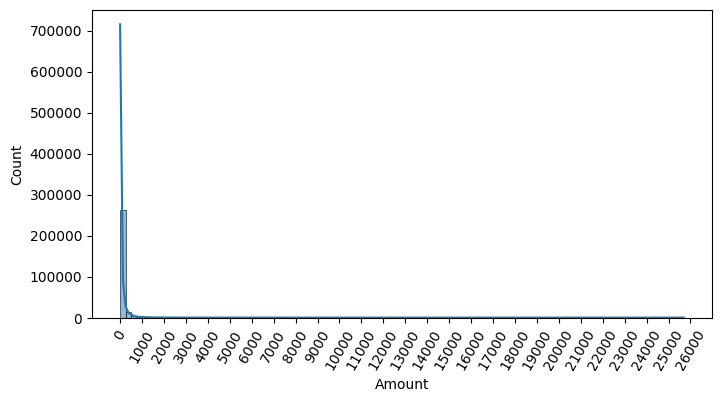

In [ ]:
# creditcard.csv 중요 피처 값 분포도 확인
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True) # Amount: 트랜잭션 금액
plt.show()

1000불 이하 데이터가 대부분

In [ ]:
from sklearn.preprocessing import StandardScaler

# Amount를 표준 정규 분포 형태로 변환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  ### fit(): 데이터의 평균 & 표준편차 계산
  ### transform(): 데이터 변환
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  # 변환된 Amount_Scaled -> df 맨 앞 칼럼에 추가
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 피처 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
# 데이터 가공 함수 수정
### 사전 데이터 가공 후 학습과 테스트 데이터 세트 반환 함수
def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

  return X_train, X_test, y_train, y_test

In [ ]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df) # 학습/테스트 데이터 세트 생성

print('### 로지스릭 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스릭 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,      F1:0.7294, AUC:0.9706

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

Logistic Regression: 정밀도 0.8692 재현율 0.6284 (저하됨)

LGBMClassifier&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 정밀도 0.9569 재현율 0.7500 (저하됨)

### 데이터 분포도 log로 변환하기

로그 변환

-> 큰 값 -> 작은 값(log 값)으로 변환

-> 데이터 분포도가 심하게 왜곡되어 있을 때 적용하는 기법 중 하나

In [ ]:
# Amount를 로그 형태로 변환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이 log1p() -> Amount를 로그로 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스릭 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스릭 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,      F1:0.7120, AUC:0.9734

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

Logistic Regression: 정밀도 0.8692 (향상됨) 재현율 0.6284 (저하됨)

LGBMClassifier&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 정밀도 0.9569 재현율 0.7500 (향상됨)

-> 레이블이 극도로 불균일한 데이터 세트에서 로지스틱 회귀는 약간 불안정한 성능 결과 도출

## 이상치 데이터 제거 후 모델 학습/예측/평가

Outlier(이상치 데이터): 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터

- 이상치를 찾는 방법
    
    - IQR(Inter Quantile Range)

      - 사분위: 전체 데이터를 내림차순 정렬해 1/4씩 구간 분할

      => IQR: Q1(25%, 1/4 분위수)~Q3(75%, 3/4 분위수) 범위
      
      -> IQR에 1.5 곱한 범위의 최댓값 초과, 최솟값 미만 데이터를 이상치로 간주
      - 최댓값 = Q3 + 1.5*IQR
      - 최솟값 = Q1 - 1.5*IQR

      ** 박스 플롯으로 시각화

어떤 피처의 이상치 데이터를 검출할 것인가?

-> **레이블과 가장 상관성이 높은 피처** 위주

<Axes: >

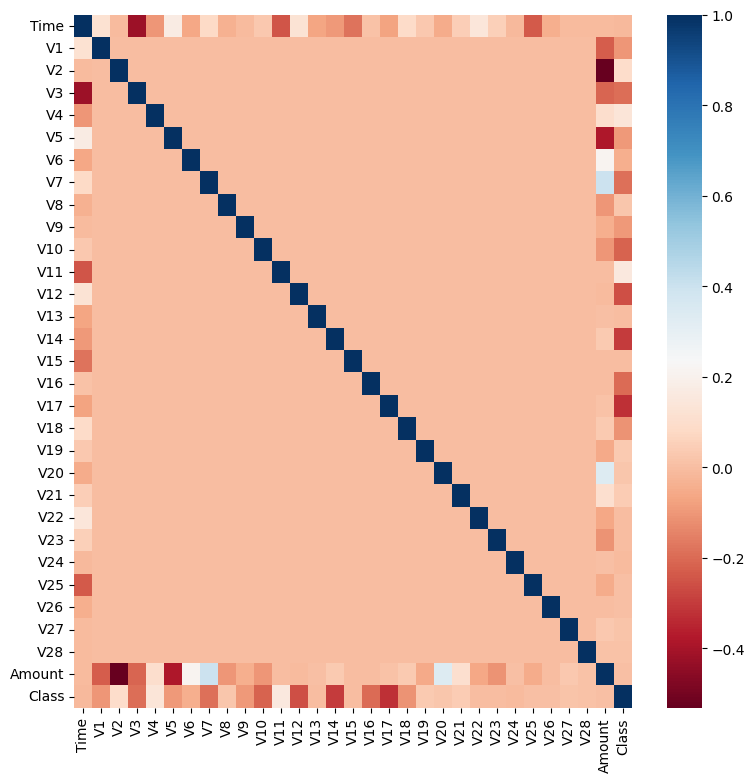

In [ ]:
# DataFrame corr()로 피처별 상관도 구한 뒤 seaborn의 heatmap으로 시각화
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

# 양의 상관관계 -> 파란색
# 음의 상관관계 -> 빨간색
## (양 또는 음의) 상관관계가 높다 = 피처가 레이블 값 변화에 영향을 많이 준다

Class와 음의 상관관계(반비례)가 가장 높은 피처: V14, V17

-> V14에 대한 이상치 찾아서 제거

In [ ]:
import numpy as np

# 파라미터: df, 이상치 검출할 column -> IOR 계산
def get_outlier(df=None, column=None, weight=1.5):
  # fraud에 해당하는 column 데이터 추출, np.percentile로 Q1, Q3 구하기
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  # IQR 구하고, 1.5 곱해 최댓값, 최솟값 지점 구하기
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# 로그 변환 + V14 피처 이상치 데이터 삭제 + Time 칼럼 삭제
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount']) # 로그 변환
  df_copy.insert(0, 'Amount_Scaled', amount_n) # 변환값 추가
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True) # Time, Amount 삭제
  outlier_index = get_outlier(df_copy, 'V14', 1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

로지스틱 회귀

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스릭 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스릭 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,      F1:0.7568, AUC:0.9725

### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.203685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

Logistic Regression: 정밀도 0.8673 (많이 향상됨) 재현율 0.6712 (많이 향상됨)

LGBMClassifier&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 정밀도 0.9603 재현율 0.8288 (많이 향상됨)

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [ ]:
# imbalanced-learn 패키지의 SMOTE 클래스로 구현
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train) # 학습 데이터에만 적용
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


SMOTE 적용 후 레이블 값 분포가 균등해짐

### 로지스틱 회귀 모델에 적용

In [ ]:
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over, y_train_over로 변경됨
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247, F1:0.1022, AUC:0.9736


재현율 92.47% (크게 향상)

정밀도 5.41% (너무 크게 저하)

-> 실제 원본보다 많은 Class=1 데이터 학습

-> 실제 테스트 데이터 세트에서 지나치게 Class=1 적용

=> 정밀도 크게 감소

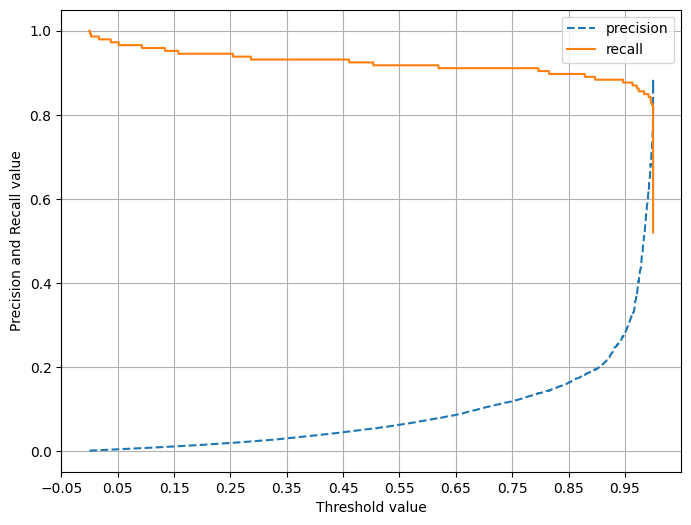

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as pit
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  pit.xlabel('Threshold value'); pit.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

임곗값 0.99 이하 -> 재현율 good / 정밀도 bad

임곗값 0.99 이상 -> 재현율 대폭 하락 / 정밀도 대폭 상승

-> 분류 결정 임곗값을 조정해도 올바른 성능을 얻을 수 없음

=> 로지스틱 회귀 모델은 SMOTE 적용 후 올바른 예측 모델 생성 불가

### LightGBM 모델에 적용

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

재현율 84.93% (향상됨)

정밀도 91.18% (저하됨)

- SMOTE 적용 -> 일반적으로 재현율 ⬆ 정밀도 ⬇

  => 재현율 지표를 높이는 것이 머신러닝 모델의 주요 목표일 때 적용하기 좋음

## 데이터 가공에 따른 예측 성능 정리

로지스틱 회귀
<table>
  <thead>
    <tr style="background-color: #dce6f1;">
      <th>전처리 방식</th>
      <th>정밀도</th>
      <th>재현율</th>
      <th>AUC</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #f2f2f2;">
      <td>없음</td>
      <td>0.8455</td>
      <td>0.6284</td>
      <td>0.9575</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>정규 분포로 변환</td>
      <td>0.8692</td>
      <td>0.6284</td>
      <td>0.9706</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>로그 변환</td>
      <td>0.8725</td>
      <td>0.6014</td>
      <td>0.9734</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>이상치 제거</td>
      <td>0.8673</td>
      <td>0.6712</td>
      <td>0.9725</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>SMOTE 오버 샘플링</td>
      <td>0.0541</td>
      <td>0.9247</td>
      <td>0.9736</td>
    </tr>
  </tbody>
</table>

Light GBM
<table>
  <thead>
    <tr style="background-color: #dce6f1;">
      <th>전처리 방식</th>
      <th>정밀도</th>
      <th>재현율</th>
      <th>AUC</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #f2f2f2;">
      <td>없음</td>
      <td>0.9573</td>
      <td>0.7568</td>
      <td>0.9803</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>정규 분포로 변환</td>
      <td>0.9569</td>
      <td>0.7500</td>
      <td>0.9779</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>로그 변환</td>
      <td>0.9576</td>
      <td>0.7635</td>
      <td>0.9796</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>이상치 제거</td>
      <td>0.9603</td>
      <td>0.8288</td>
      <td>0.9780</td>
    </tr>
    <tr style="background-color: #f2f2f2;">
      <td>SMOTE 오버 샘플링</td>
      <td>0.9118</td>
      <td>0.8493</td>
      <td>0.9814</td>
    </tr>
  </tbody>
</table>

# Kaggle 필사 1 - Decision Tree and Random Forest Classifier Models


## Import Libraries

In [ ]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Data Review
캐글의 "drug200.csv" 사용

*(약 투여에 관한 데이터...인 듯함)*

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### 데이터의 전체적인 정보와 분포 확인

In [ ]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


null 값 없음

int, string, float 데이터 타입 존재

In [ ]:
# dataset values(max, min, std 등)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# data correlation: relationship between columns
data.corr()

ValueError: could not convert string to float: 'F'

버전이 업데이트되면서 수 데이터만 계산하지 않게 됨

-> numeric_only=True 파라미터 사용

In [ ]:
# data correlation: relationship between columns about only numeric data
# 각 열 간의 상관계수 반환 함수
data.corr(numeric_only=True)

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


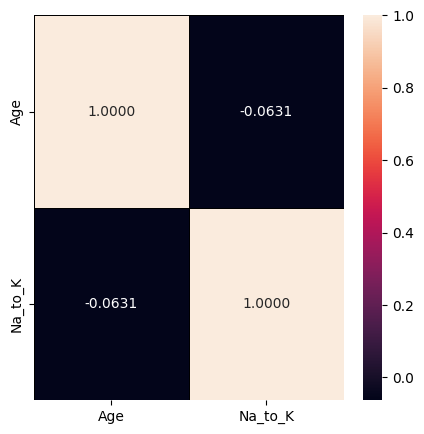

In [ ]:
# visualization of correlation result with sns heatmap
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=0.5, linecolor="black", fmt=".4f", ax=ax)
plt.show()

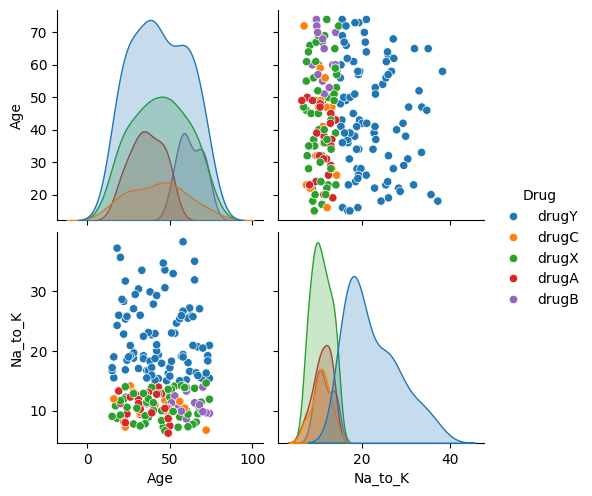

In [ ]:
# visualization of correlation result with sns pairplot
sns.pairplot(data, hue="Drug")

- Age 분포
  
  - drugY를 복용한 사람들의 평균 나이가 다른 약물들의 것보다 높음
  - drugB는 소수의 고연령층에서 복용

- Na_to_K 분포

  - drugY를 복용한 사람들은 Na_to_K 값이 큼

In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### 칼럼 내 데이터 체크

In [ ]:
# data in the age column
data["Age"].value_counts(dropna=False)

,count
Age,
47,8
23,7
28,7
49,7
32,6
39,6
50,5
60,5
22,5


In [ ]:
# data in the sex column
data["Sex"].value_counts()

,count
Sex,
M,104
F,96


In [ ]:
# data in the BP column
data["BP"].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [ ]:
# data in the cholesterol column
data["Cholesterol"].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [ ]:
# data in the drug column
data["Drug"].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


## Data Visualization

In [ ]:
# visualize the number of age in the dataset
dataAge = data["Age"].value_counts(dropna=False)
npar_dataAge = np.array(dataAge) # Age 데이터만 뽑아서 벡터로 저장
x = list(npar_dataAge)
y = data.Age.value_counts().index # Age 데이터 종류에 인덱스 붙임

DataAge = {"Age": y, "Number": x} # 딕셔너리
DataAge = pd.DataFrame(DataAge)   # DF

fig = px.bar(DataAge, x="Age", y="Number")
fig.show()

In [ ]:
# visualize the number of Sex in the dataset
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data = [go.Pie(labels=['M','F'], values=[104, 96])]) # Plotly의 Figure 객체 생성
# go.Pie: 원형 차트 생성
## labels: 조각 이름  values: 조각 크기

fig.update_traces(hoverinfo='label + percent', textinfo='value',  # 그래프 스타일 & 정보 설정 업데이트
                  textfont_size=20, marker=dict(colors=colors, line=dict(color="#000000", width=2)))
fig.show()

In [ ]:
# visualize the number of BP in the dataset
fig = px.bar(x=["HIGH", "LOW", "NORMAL"], y=[77,64,59])
fig.show()

In [ ]:
# visualize the number of cholesterol in the dataset
fig = px.histogram(x=["HIGH", "NORMAL"], y=[103, 97])
fig.show()

In [ ]:
# visualize the number of Drug in the dataset
fig = go.Figure(data=[go.Pie(labels=["DrugY", "DrugX", "DrugA", "DrugC", "DrugB"], values=[91,54,23,16,16])])
fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                  marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))
fig.show()

In [ ]:
# visualize the relationship between age and Na_to_K
fig = px.scatter(data, x = "Na_to_K", y="Age", color="Drug", size='Age', hover_data=['Na_to_K'])
fig.show()

## Classifications Models

### Data Preparing

In [ ]:
# 데이터 전처리할 것이므로 변형한 데이터를 저장할 df 새롭게 생성
dataclass = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/drug200.csv")
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# check object type
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


- object type: Sex, BP, Cholesterol, Drug

In [ ]:
# change sex type
## F = 1, M = 0
dataclass.Sex = [1 if i=="F" else 0 for i in dataclass.Sex]
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [ ]:
# change BP type
## LOW=2, NORMAL=1, HIGH=0

import warnings
warnings.filterwarnings('ignore')

## LOW 데이터를 무시함 -> 왜지?
# for i in range(0,len(dataclass.BP)):
#   if dataclass.BP[i] == "LOW":
#     dataclass.BP[i] = 2

#   if dataclass.BP[i] == "NORMAL":
#     dataclass.BP[i] = 1

#   else:
#     dataclass.BP[i] = 0

### map이나 불리언인덱싱으로도 가능
dataclass['BP'] = dataclass['BP'].map({'LOW':2, 'NORMAL':1, 'HIGH':0}).astype(int)

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,drugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [ ]:
# change Cholesterol type
## HIGH=1. NORMAL=0
dataclass.Cholesterol = [1 if i=="HIGH" else 0 for i in dataclass.Cholesterol]

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,drugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [ ]:
# change Drug type
## Y=4, X=3, A=2, C=1, B=0

import warnings
warnings.filterwarnings('ignore')

### map을.. 써봄
dataclass['Drug'] = dataclass['Drug'].map({'drugY':4, 'drugX':3, 'drugA':2, 'drugC':1, 'drugB':0}).astype(int)

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [ ]:
# check for possible unchanged types
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
# BP, Drug에 대해 형변환 해주기
data_types_dict = {'BP':int, 'Drug':int}
dataclass=dataclass.astype(data_types_dict)
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


object 타입 사라짐,

In [ ]:
# x_data(피처), y_data(레이블) 추출

### drop으로 버려도 되고...
x_data = dataclass.iloc[:, :-1]
y_data = dataclass.Drug.values # numpy array로 추출됨

In [ ]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [ ]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

## Decision Tree Classifier

### 전처리한 데이터 그대로 default 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train) # 학습
predict = dtc.predict(X_test) # 예측

print('The accuracy of the Decision Tree is', metrics.accuracy_score(predict, y_test))

The accuracy of the Decision Tree is 0.9666666666666667


### criterion 설정 (+max_depth 설정)

*Decision Tree Classifier with "gini"*

*criterion='gini' 설정 -> 근데 criterion의 디폴트 값이 gini인 것으로 알고 있음*

-> **트리 max_depth 설정 여부에 대한 정확도 차이**

In [ ]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTC_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_gini = DTC_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'.format
                                              (accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9000


In [ ]:
y_pred_gini # test 데이터 예측

array([3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 2, 2, 3, 3, 0, 4, 3, 3,
       3, 4, 0, 3, 3, 4, 3, 3, 3, 4, 4, 4, 2, 4, 2, 4, 4, 4, 0, 4, 4, 3,
       0, 4, 3, 3, 4, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2])

In [ ]:
y_pred_train_gini = DTC_gini.predict(X_train) # 학습 데이터 예측

y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DTC_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTC_gini.score(X_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


학습 데이터로 다시 예측했을 때의 정확도가 더 높음

*학습 데이터의 정확도가 100이라면 과적합된 것*

Decision Tree Classifier with "entropy"

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DTC_en.fit(X_train, y_train) # 학습

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = DTC_en.predict(X_test)
print('Model accuracy score with criterion entropy index: {0:0.4f}'.format
                                              (accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy index: 0.9000


In [ ]:
y_pred_train_en = DTC_gini.predict(X_train) # 학습 데이터 예측

y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DTC_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTC_en.score(X_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


- 'gini': 클래스가 섞여 있는 정도를 기준으로 분할
- 'entropy': 분할 전후 정보량 차이를 기준으로 분할

## Random Forest Classifier

### 디폴트 학습

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train) # 학습
predict = rfc.predict(X_test) # 예측
print('The accuracy of the Random Forest is', accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.95


### Random Forest Classifier with "n_estimators=100"

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train) # 학습
predict = rfc_100.predict(X_test) # 예측
print('The accuracy of the Random Forest is', accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.95


### find the best parameter about 'random_state' and 'n_estimators'

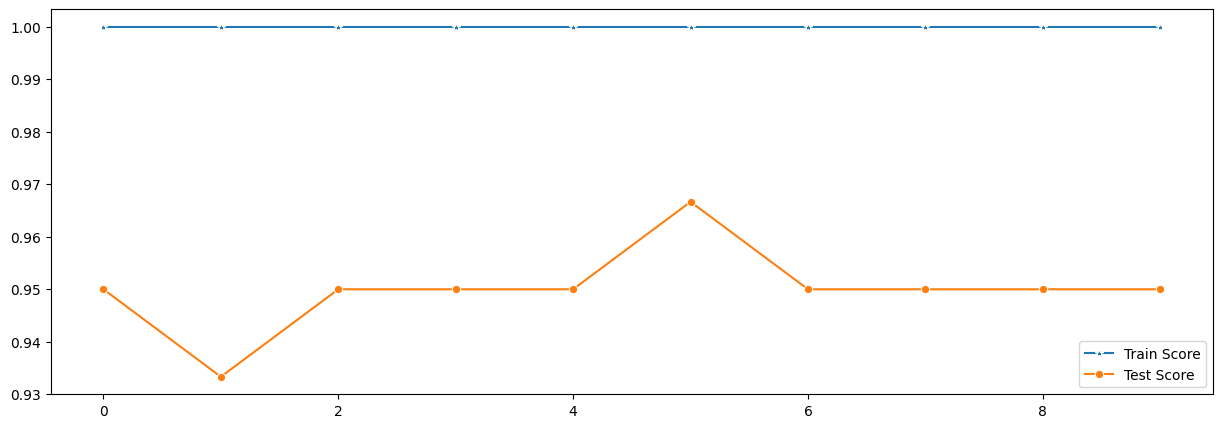

In [ ]:
# find the best random_state value
test_score_list = []
train_score_list = []

for i in range(0, 10):
  rfc2 = RandomForestClassifier(random_state=i) # i값을 가지는 random_state
  rfc2.fit(X_train, y_train)
  test_score_list.append(rfc2.score(X_test, y_test))
  train_score_list.append(rfc2.score(X_train, y_train))

plt.figure(figsize=(15, 5))
# lineplot 그릴 때 x, y 인자 명확히 적어줘야 얘가 안 헷갈림
# positional argument(명시적 전달X 파라미터)는 0~1개만 허용
p = sns.lineplot(x=range(0,10), y=train_score_list, marker='*', label='Train Score')
p = sns.lineplot(x=range(0,10), y=test_score_list, marker='o', label='Test Score')

best random_state = 5

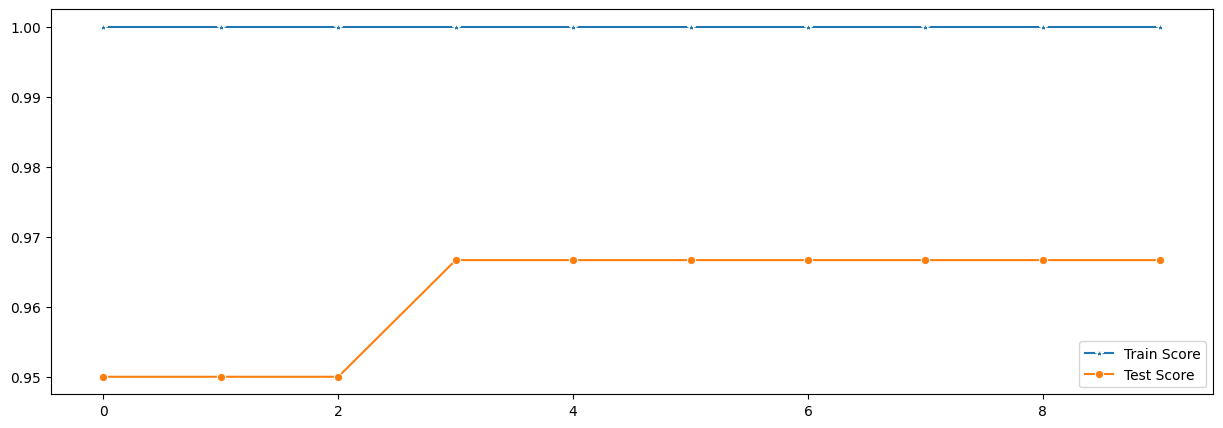

In [ ]:
# find the best n_estimators parameter
test_score_list = []
train_score_list = []

list_n_estimators = range(10,101,10)

for i in list_n_estimators:
  rfc3 = RandomForestClassifier(n_estimators=i, random_state=5) # i값을 가지는 random_state
  rfc3.fit(X_train, y_train)
  test_score_list.append(rfc3.score(X_test, y_test))
  train_score_list.append(rfc3.score(X_train, y_train))

plt.figure(figsize=(15, 5))
# lineplot 그릴 때 x, y 인자 명확히 적어줘야 얘가 안 헷갈림
# positional argument(명시적 전달X 파라미터)는 0~1개만 허용
p = sns.lineplot(x=range(0,len(list_n_estimators)), y=train_score_list, marker='*', label='Train Score')
p = sns.lineplot(x=range(0,len(list_n_estimators)), y=test_score_list, marker='o', label='Test Score')

best n_estimators >= 3

### Random Forest Classifier With the Best Parameters

In [ ]:
last_rfc = RandomForestClassifier(n_estimators=100, random_state=5)
last_rfc.fit(X_train, y_train) # 학습
predict = last_rfc.predict(X_test) # 예측
print('The accuracy of the Random Forest is', accuracy_score(predict, y_test)) # 평가

The accuracy of the Random Forest is 0.9666666666666667


In [ ]:
y_pred_en = last_rfc.predict(X_test)
print('Model accuracy score with best parameters: {0:0.4f}'.
                              format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with best parameters: 0.9667


In [ ]:
y_pred_train_en = last_rfc.predict(X_train)
y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores with best parameters on training and test set
print('Training set score: {:.4f}'.format(last_rfc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(last_rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9667


학습 데이터에 대해서는 완전히 학습된 것을 알 수 있음

## Evaluation Classification Models

### Confusion Maxtix (오차행렬, 혼동행렬)
= a tabular representation of prediction outcomes

describe the performance of the classificaiton model on a set of test data when true values are known

In [ ]:
# confusion matrix for DecisionTreeClassifier without Parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cm_des = DecisionTreeClassifier()
cm_des.fit(X_train, y_train) # 학습
y_pred_cm = cm_des.predict(X_test) # 예측
y_true = y_test

cm_des1 = confusion_matrix(y_true, y_pred_cm)
print(cm_des1)

print()
print('y_true 모양새: ', y_true)

[[ 4  0  2  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

y_true 모양새:  [3 4 3 1 4 3 3 4 4 4 3 1 4 4 2 2 3 3 0 4 3 3 3 4 0 3 3 4 1 3 1 4 4 4 2 4 2
 4 4 4 0 4 4 3 0 4 3 3 4 0 4 4 4 4 4 4 3 3 3 0]


- 교재에서 배운 confusion matrix: T F로 결정되는 결정 트리 예측 모델의 confusion matrix

  -> 4분면 표

- 이 예시의 confusion matrix: y_true 값이 0~4

  -> 예측 레이블 값이 5개임
  
  => 5x5 matrix

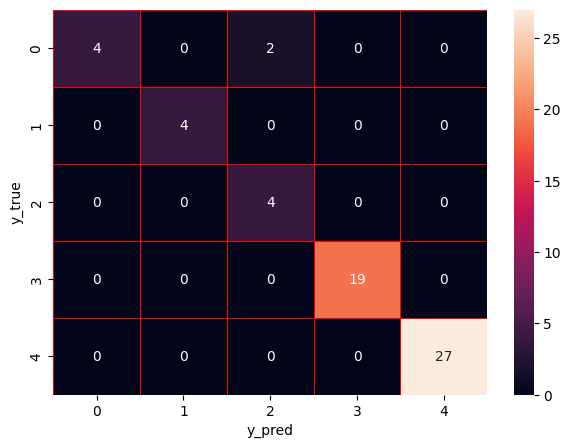

In [ ]:
fm, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des1, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

=> y_true=0, y_pred=2인 오차인 경우 2회 발생

In [ ]:
# Confusion Matrix for Decision Tree Classifier with "gini"
cm_des_gini=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
cm_des_gini.fit(X_train, y_train) # 학습
y_pred_cm = cm_des_gini.predict(X_test) # 예측
y_true = y_test

cm_des2 = confusion_matrix(y_true, y_pred_cm)
print(cm_des2)

[[ 4  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


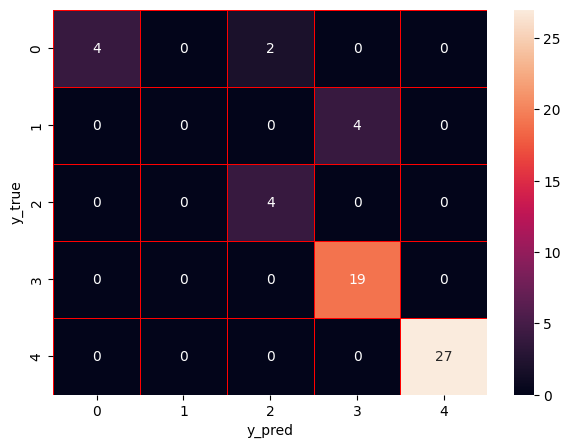

In [ ]:
fm, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des2, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

- y_true=0, y_pred=2인 경우 2회,

  y_true=1, y_pred=3인 경우 4회

In [ ]:
# confusion Matrix for Random Forest Classifier with the Best Parameters
cm_last_rfc = RandomForestClassifier(n_estimators=100, random_state=5)
cm_last_rfc.fit(X_train, y_train) # 학습
y_pred_cm = cm_last_rfc.predict(X_test) # 예측
y_true = y_test

cm_rfc = confusion_matrix(y_true, y_pred_cm) # confution matrix 객체
print(cm_rfc)

[[ 4  0  2  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


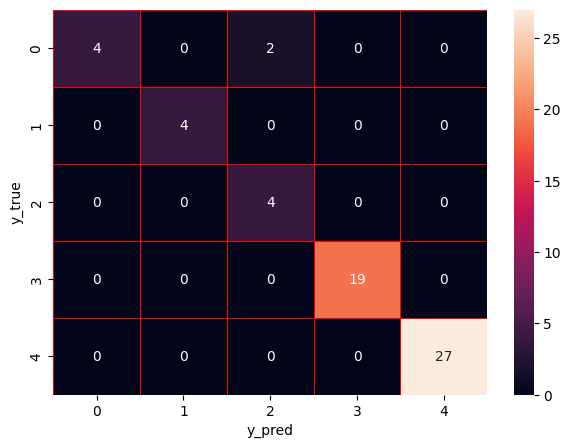

In [ ]:
fm, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_rfc, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

=> y_true=0, y_pred=2인 경우 2회

# Kaggle 필사 2 - Beginner Friendly CATBOOST with OPTUNA

## Data - Heart Failure Prediction Dataset

- label = 'HeartDisease'
- will build a model to get best classification possible on the target variable
  
  -> look **balance** of the target variable

- use Accuracy score

## 라이브러리 설치 & 임포트

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

#importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(offline=True, world_readable=True)

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"

from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [ ]:
# 데이터 로딩 및 DataFrame 추출
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)

pd.set_option('display.max_colwidth', 200)

## pandas가 'max_columns' 등의 옵션 이름을 찾으려고 했으나 비슷한 이름이 여러 개 있어 찾지 X

df = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**# Null 확인**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


null 값 X

**# 중복 데이터 확인**

In [ ]:
df.duplicated().sum()

0

No duplicates

In [ ]:
# Null값 확인 함수
def missing(df):
  missing_number = df.isnull().sum().sort_values(ascending=False) # null값 개수
  missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # null값 %
  missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
  return missing_values

missing(df)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


No missing values

**# 데이터 타입별 칼럼 확인**

In [ ]:
numerical = df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns # 레이블 제외 numeric data
categorical = df.select_dtypes('object').columns # string data

print(f'Numerical Columns: {df[numerical].columns}')
print()
print(f'Categorical Columns: {df[categorical].columns}')


Numerical Columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [ ]:
df[categorical].nunique() # 데이터의 고유값 수 반환

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


각 카테고리별 데이터 종류

데이터가 0종류인 것도 없고, 종류가 너무 많은 카테고리도 없다!

### **Target Variable**

In [ ]:
# 레이블 분포 확인
y = df['HeartDisease'] # 레이블
print(f'Percentage of patient had a HeartDisease: {round(y.value_counts(normalize=True)[1]*100,2)} % --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a HeartDisease: {round(y.value_counts(normalize=True)[0]*100,2)} % --> ({y.value_counts()[0]} patient)')

Percentage of patient had a HeartDisease: 55.34 % --> (508 patient)
Percentage of patient did not have a HeartDisease: 44.66 % --> (410 patient)


- 약 55% patients had a heart disease => 508 patients
- 약 45% patients did not have a heart disease => 410 patients

In [ ]:
df['HeartDisease'].iplot(kind='hist')

- a little imbalance but nothing in matter
  
  -> can use 'accuracy' metric

### Numerical Features

In [ ]:
df[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [ ]:
df[numerical].iplot(kind='hist') # 전체 숫자 데이터 분포 확인

In [ ]:
df[numerical].iplot(kind='histogram', subplots=True, bins=50) # 개별 숫자 데이터 분포 확인

In [ ]:
# threshold-limit to evaluate skewness(비대칭도, 왜도)
## : 왜도 절댓값이 0.75를 넘으면 너무 비대칭적이라고 판단
skew_limit = 0.75

# 수치형 변수들 중 FastingBS(이진 변수) 제외한 변수들의 왜도 계산
skew_vals = df[numerical].drop('FastingBS', axis=1).skew()

# skew > 0.75인 칼럼 필터링
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols

,0
Oldpeak,1.022872


치우침이 그렇게 심하지 않음

<Axes: >

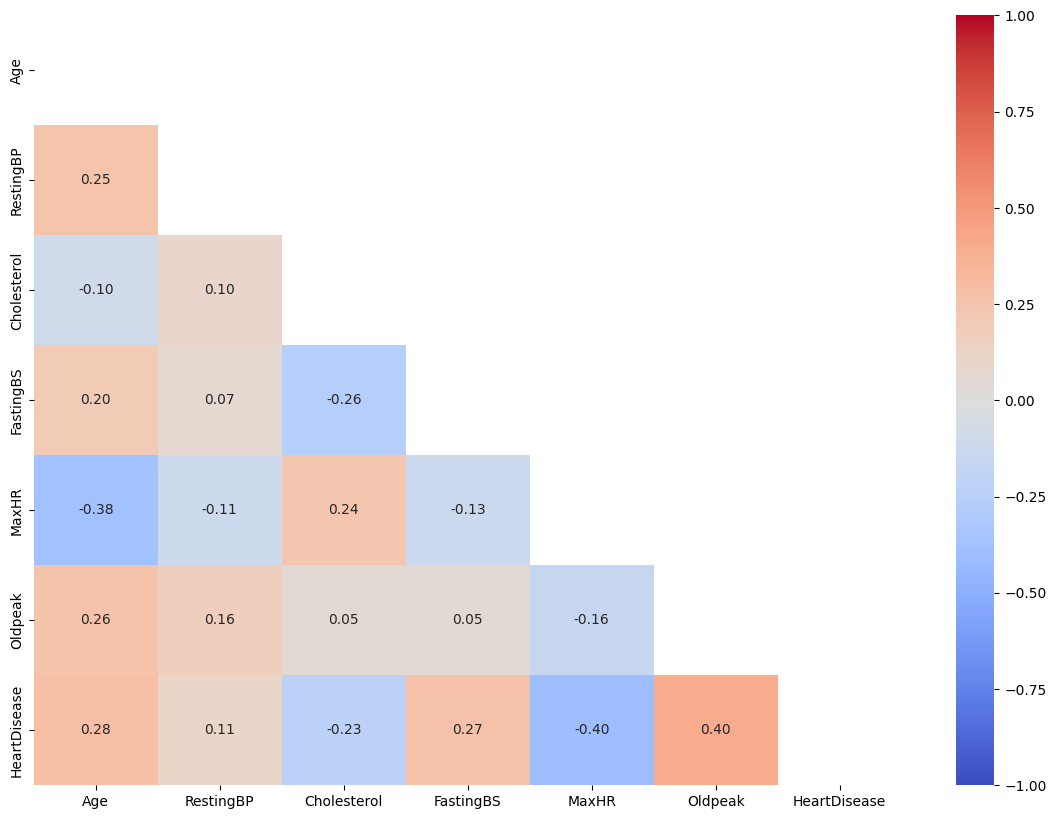

In [ ]:
numerical1 = df.select_dtypes('number').columns

# 상관계수 시각화
matrix = np.triu(df[numerical1].corr())
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df[numerical1].corr(), annot=True,
              fmt='.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix, ax=ax)

- *weak level correlation* between the numeric features & target variable
- **Oldpeak**
  
  has a positive correlation with the heart disease
- **Maximum heart**

  has negative correlation with the heart disease
- **Cholesterol**

  has negative correlation with the heart disease

### Categorical Features

In [ ]:
df[categorical].head() # 카테고리형 피처 확인

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


**Gender and Heart Disease**

In [ ]:
print(f'A female person has a probability of {round(df[df["Sex"]=="F"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')
print()
print(f'A male person has a probability of {round(df[df["Sex"]=="M"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')
print()

A female person has a probability of 25.91 % have a HeartDisease

A male person has a probability of 63.17 % have a HeartDisease



In [ ]:
fig = px.histogram(df, x="Sex", color="HeartDisease", width=400, height=400)
fig.show()

Men -> almost 2.44 times more patients

**Chest Pain Type and Heart Disease**

In [ ]:
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ChestPainType,
ASY,0.790323
TA,0.434783
NAP,0.354680
ATA,0.138728


In [ ]:
fig = px.histogram(df, x="ChestPainType", color="HeartDisease",width=400, height=400)
fig.show()

Person with ASY has 6 times more heartDisease than ATA

**RestingECG and Heart Disease**

In [ ]:
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
RestingECG,
ST,0.657303
LVH,0.563830
Normal,0.516304


In [ ]:
fig = px.histogram(df, x="RestingECG", color="HeartDisease",width=400, height=400)
fig.show()

RestingECG actually don't differ much

Person with ST is more likely have a heart disease (비율이..)

**ExerciseAngina and Heart Disease**

In [ ]:
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ExerciseAngina,
Y,0.851752
N,0.351005


In [ ]:
fig = px.histogram(df, x="ExerciseAngina", color="HeartDisease",width=400, height=400)
fig.show()

'Y' is 2.4 times more likely have a heart disease

**ST_Slope and Heart Disease**

In [ ]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ST_Slope,
Flat,0.828261
Down,0.777778
Up,0.197468


In [ ]:
fig = px.histogram(df, x="ST_Slope", color="HeartDisease",width=400, height=400)
fig.show()

'Up' significantly less likely has heart disease

## Model Seleciton

- will use **dummy classifier** model as a base model
- **Logistic & Linear Discriminant & KNeighbors and Support Vector Machine** models
  
  with and without scaler
- use **ensemble models, Adaboost, RandomForest, Gradient Boosting, Extra Trees**

- **XGBoost & LightGBM & Catboost**
- Catboost hyperparameter tuning

### Baseline Model

In [ ]:
accuracy = []
model_names = []

X = df.drop('HeartDisease', axis=1) # feature data
y = df['HeartDisease']              # label (target data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 데이터 분할

ohe = OneHotEncoder() # 원-핫 인코딩: 문자형 데이터에 숫자형 값 부여하는 인코딩
# make_column_transformer: 클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여줌
ct = make_column_transformer((ohe, categorical), remainder='passthrough')

model = DummyClassifier(strategy='constant', constant=1) # dummy 분류 객체 생성
pipe = make_pipeline(ct, model) # 파이프라인 생성
pipe.fit(X_train, y_train) # 학습
y_pred = pipe.predict(X_test) # 예측
accuracy.append(round(accuracy_score(y_test, y_pred), 4))
print(f'model: {model} and  accuracy score is: {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
dummy_result_df

model: DummyClassifier(constant=1, strategy='constant') and  accuracy score is: 0.5942


,Accuracy
DummyClassifier,0.5942


### Logistic & Linear Discriminant & SVC & KNN

In [ ]:
accuracy = []
model_names = []

X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical), remainder='passthrough')

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model: {model} and  accuracy score is: {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy': accuracy}, index=model_names)
result_df1

model: LogisticRegression(solver='liblinear') and  accuracy score is: 0.8841
model: LinearDiscriminantAnalysis() and  accuracy score is: 0.8696
model: SVC() and  accuracy score is: 0.7246
model: KNeighborsClassifier() and  accuracy score is: 0.7174


,Accuracy
Logistic,0.8841
LinearDiscriminant,0.8696
SVM,0.7246
KNeighbors,0.7174


## Logistic & Linear Discriminant & SVC & KNN with Scaler

In [ ]:
accuracy = []
model_names = []


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe = OneHotEncoder()
s = StandardScaler()
ct1 = make_column_transformer((ohe, categorical), (s, numerical))


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models:
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl','KNeighbors_scl']
result_df2 = pd.DataFrame({'Accuracy': accuracy}, index=model_names)
result_df2

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8804
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.8841
model : KNeighborsClassifier() and  accuracy score is : 0.8841


,Accuracy
Logistic_scl,0.8804
LinearDiscriminant_scl,0.8696
SVM_scl,0.8841
KNeighbors_scl,0.8841


with Scaler -> KNN & SVM did a better job than previous ones

### Ensemble Models (AdaBoost & Gradient Boosting & Random Forest & Extra Trees)

In [ ]:
accuracy = []
model_names = []


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical), remainder='passthrough')

ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et = ExtraTreesClassifier(random_state=0)

models = [ada, gb, rf, et]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))
    print (f'model: {model} and  accuracy score is: {round(accuracy_score(y_test, y_pred), 4)}')

model_names = ['Ada', 'Gradient', 'Random', 'ExtraTree']
result_df3 = pd.DataFrame({'Accuracy': accuracy}, index=model_names)
result_df3

model: AdaBoostClassifier(random_state=0) and  accuracy score is: 0.8732
model: GradientBoostingClassifier(random_state=0) and  accuracy score is: 0.8768
model: RandomForestClassifier(random_state=0) and  accuracy score is: 0.8877
model: ExtraTreesClassifier(random_state=0) and  accuracy score is: 0.8804


,Accuracy
Ada,0.8732
Gradient,0.8768
Random,0.8877
ExtraTree,0.8804


- Accuracy Scores close to each other
- Random Forest & eXtra tree -> similar accuracy scores

### Famous Trio (XGBoost & LightGBM & Catboost)

- Catboost: categorical variables encoding without any preprocessing
- XGBoost & Light GBM

In [ ]:
accuracy = []
model_names = []


X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe = OneHotEncoder()
ct = make_column_transformer((ohe, categorical), remainder='passthrough')

xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)


models = [xgbc, lgbmc]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))

model_names = ['XGBoost','LightGBM']
result_df4 = pd.DataFrame({'Accuracy': accuracy}, index=model_names)
result_df4

[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy
XGBoost,0.8478
LightGBM,0.8732


Catboost -> XGBoost, LightGBM보다 성능이 좋아짐

### CATBOOST

손실함수 설정

- Logloss: 이진 분류(Binary Classification) 문제에 사용

  - target_border: 레이블 경곗값 설정 -> 연속적 값을 분류 문제로 설정 가능
- MultiClass: 다중 클래스 분류 문제에 사용

In [34]:
accuracy = []
model_names = []

X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != float)[0]
## np.float는 완전히 삭제된 방식

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False, random_state=0)

model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred), 4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy': accuracy}, index=model_names)
result_df5

,Accuracy
Catboost_default,0.8804


### Catboost HyperParameter Tuning with Optuna

In [35]:
def objective(trial):
    X= df.drop('HeartDisease', axis=1)
    y= df['HeartDisease']
    categorical_features_indices = np.where(X.dtypes != float)[0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                cat_features=categorical_features_indices, verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2025-04-07 14:30:45,244] A new study created in memory with name: no-name-fdb1142a-e45d-42e0-b951-bac64941a42e
[I 2025-04-07 14:30:49,210] Trial 0 finished with value: 0.8913043478260869 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09019310185518502, 'depth': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.3747546261858977}. Best is trial 0 with value: 0.8913043478260869.
[I 2025-04-07 14:30:54,848] Trial 1 finished with value: 0.8913043478260869 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.038103467449276875, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8913043478260869.
[I 2025-04-07 14:30:59,248] Trial 2 finished with value: 0.8840579710144928 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.03924761171937006, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.25832433484999}. Best is trial 0 with value: 0

Number of finished trials: 50
Best trial:
  Value: 0.8985507246376812
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.05974070261917007
    depth: 9
    boosting_type: Ordered
    bootstrap_type: MVS


파라미터
- Objective: **CrossEntropy**

  - 과적합 제어가 되고 최적 모델을 선택할 수 있는 함수
- colsample_bylevel: **0.05974070261917007**

  - 트리의 각 level마다 사용할 피처 비율 -> 학습 성능이 조절됨
- depth: **9**

  - 트리의 깊이
- boosting_type: **Ordered**

  - 부스팅 학습 방식 지정
- bootstrap_type: **MVS**

  - 데이터 샘플링 방식 지정

using best hyper parameters

In [36]:
accuracy = []
model_names = []


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False, random_state=0, objective= 'CrossEntropy',
                           colsample_bylevel= 0.04292240490294766,
                           depth= 10,
                           boosting_type= 'Plain',
                           bootstrap_type= 'MVS')

model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy': accuracy}, index=model_names)
result_df6

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       112
           1       0.93      0.91      0.92       164

    accuracy                           0.91       276
   macro avg       0.90      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276



,Accuracy
Catboost_tuned,0.9094


### Feature Importance

In [37]:
feature_importance = np.array(model.get_feature_importance())
features = np.array(X_train.columns)
fi={'features': features, 'feature_importance': feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True, inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features', title="CatBoost Feature Importance", height=500)
fig.show()

### Model Comparison

In [38]:
result_final = pd.concat([dummy_result_df, result_df1, result_df2, result_df3, result_df4, result_df5, result_df6], axis=0)

In [39]:
result_final.sort_values(by=['Accuracy'], ascending=True, inplace=True)
fig = px.bar(result_final, x='Accuracy', y=result_final.index, title='Model Comparison', height=600, labels={'index': 'MODELS'})
fig.show()